# **CHAPTER 7**

# The Sequential Model

In [1]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

Incrementally building a Sequential model

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

models that aren't yet built have no weights

In [3]:
model.weights

[]

In [4]:
model.build(input_shape=(None,3))
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

The summary method 

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Naming models and layers with the name argument

In [6]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64,activation='relu',name='my_first_layer')),
model.add(layers.Dense(10, activation='softmax',name='my_last_layer'))
model.build(input_shape=(None,3)),

model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Specifying the input shape of your model in advance

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

# Functional API

A simple Functional model with two Dense layers

In [9]:
inputs = keras.Input(shape=(3,),name='my_input')
features = layers.Dense(64, activation='relu') (inputs)
outputs = layers.Dense(10, activation='softmax') (features)
model = keras.Model(inputs=inputs,outputs=outputs)

In [10]:
print(inputs.shape)
print(inputs.dtype)

(None, 3)
float32


In [11]:
features.shape

(None, 64)

In [12]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

A multi-input, multi-output Functional model

In [13]:
vocabulary_size=10000
num_tags=100
num_departments=4

title  =keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,),name='text_body')
tags = keras.Input(shape=(num_tags,),name='tags')

features = layers.Concatenate() ([title,text_body,tags])
features = layers.Dense(64,activation='relu')(features)

priority = layers.Dense(1,activation='sigmoid',name='priority') (features)
department = layers.Dense(num_departments,activation='softmax',name='department') (features)

model = keras.Model(inputs=[title,text_body,tags], outputs=[priority,department])

Training a model by providing lists of input and target arrays

In [14]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
text_body_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples,num_tags))

priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples,num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error','categorical_crossentropy'],
              metrics = [['mean_absolute_error'],['accuracy']])

model.fit([title_data,text_body_data,tags_data], [priority_data,department_data],
          epochs=1)

model.evaluate([title_data,text_body_data,tags_data],[priority_data,department_data])

priority.pred, department_pred = model.predict([title_data,text_body_data,tags_data])

c:\Users\ZYAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['title', 'text_body', 'tags']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - department_accuracy: 0.2361 - department_loss: 31.2585 - loss: 31.5423 - priority_loss: 0.2838 - priority_mean_absolute_error: 0.4498
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.5440 - department_loss: 15.3471 - loss: 15.6760 - priority_loss: 0.3289 - priority_mean_absolute_error: 0.4894
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Training a model by providing dicts of input and target arrays

In [ ]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

The power of the Functional API: Access to layer connectivity

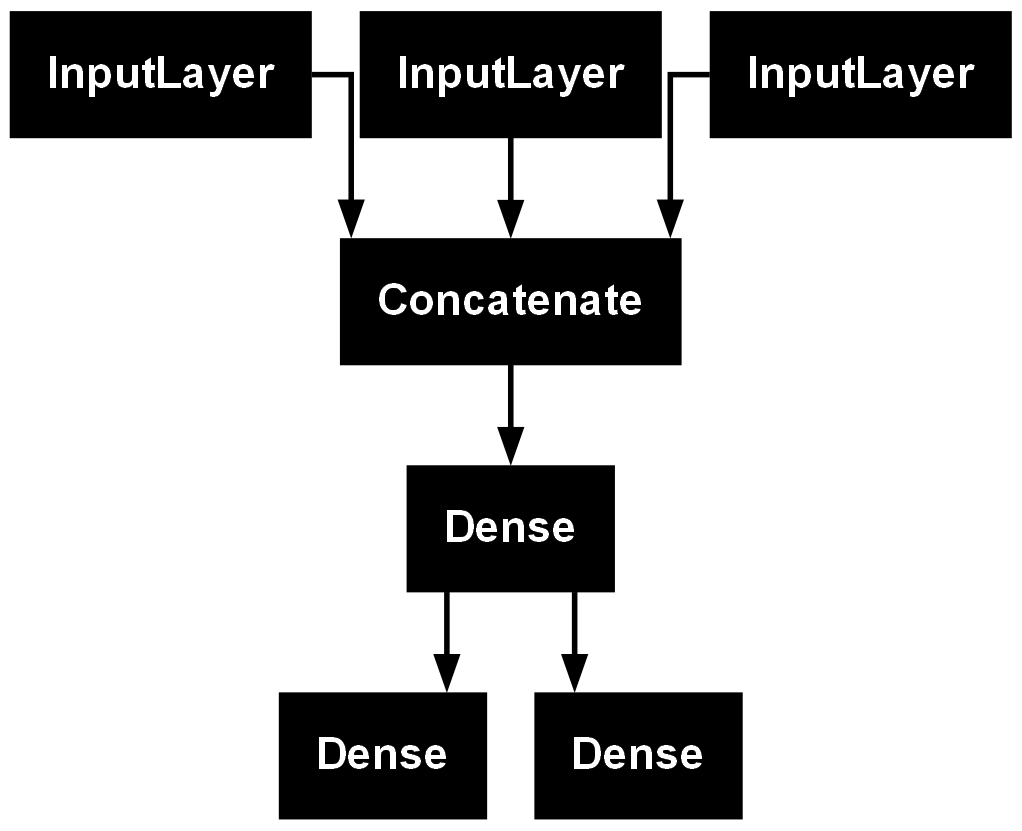

In [16]:
keras.utils.plot_model(model, "ticket_classifier.png")

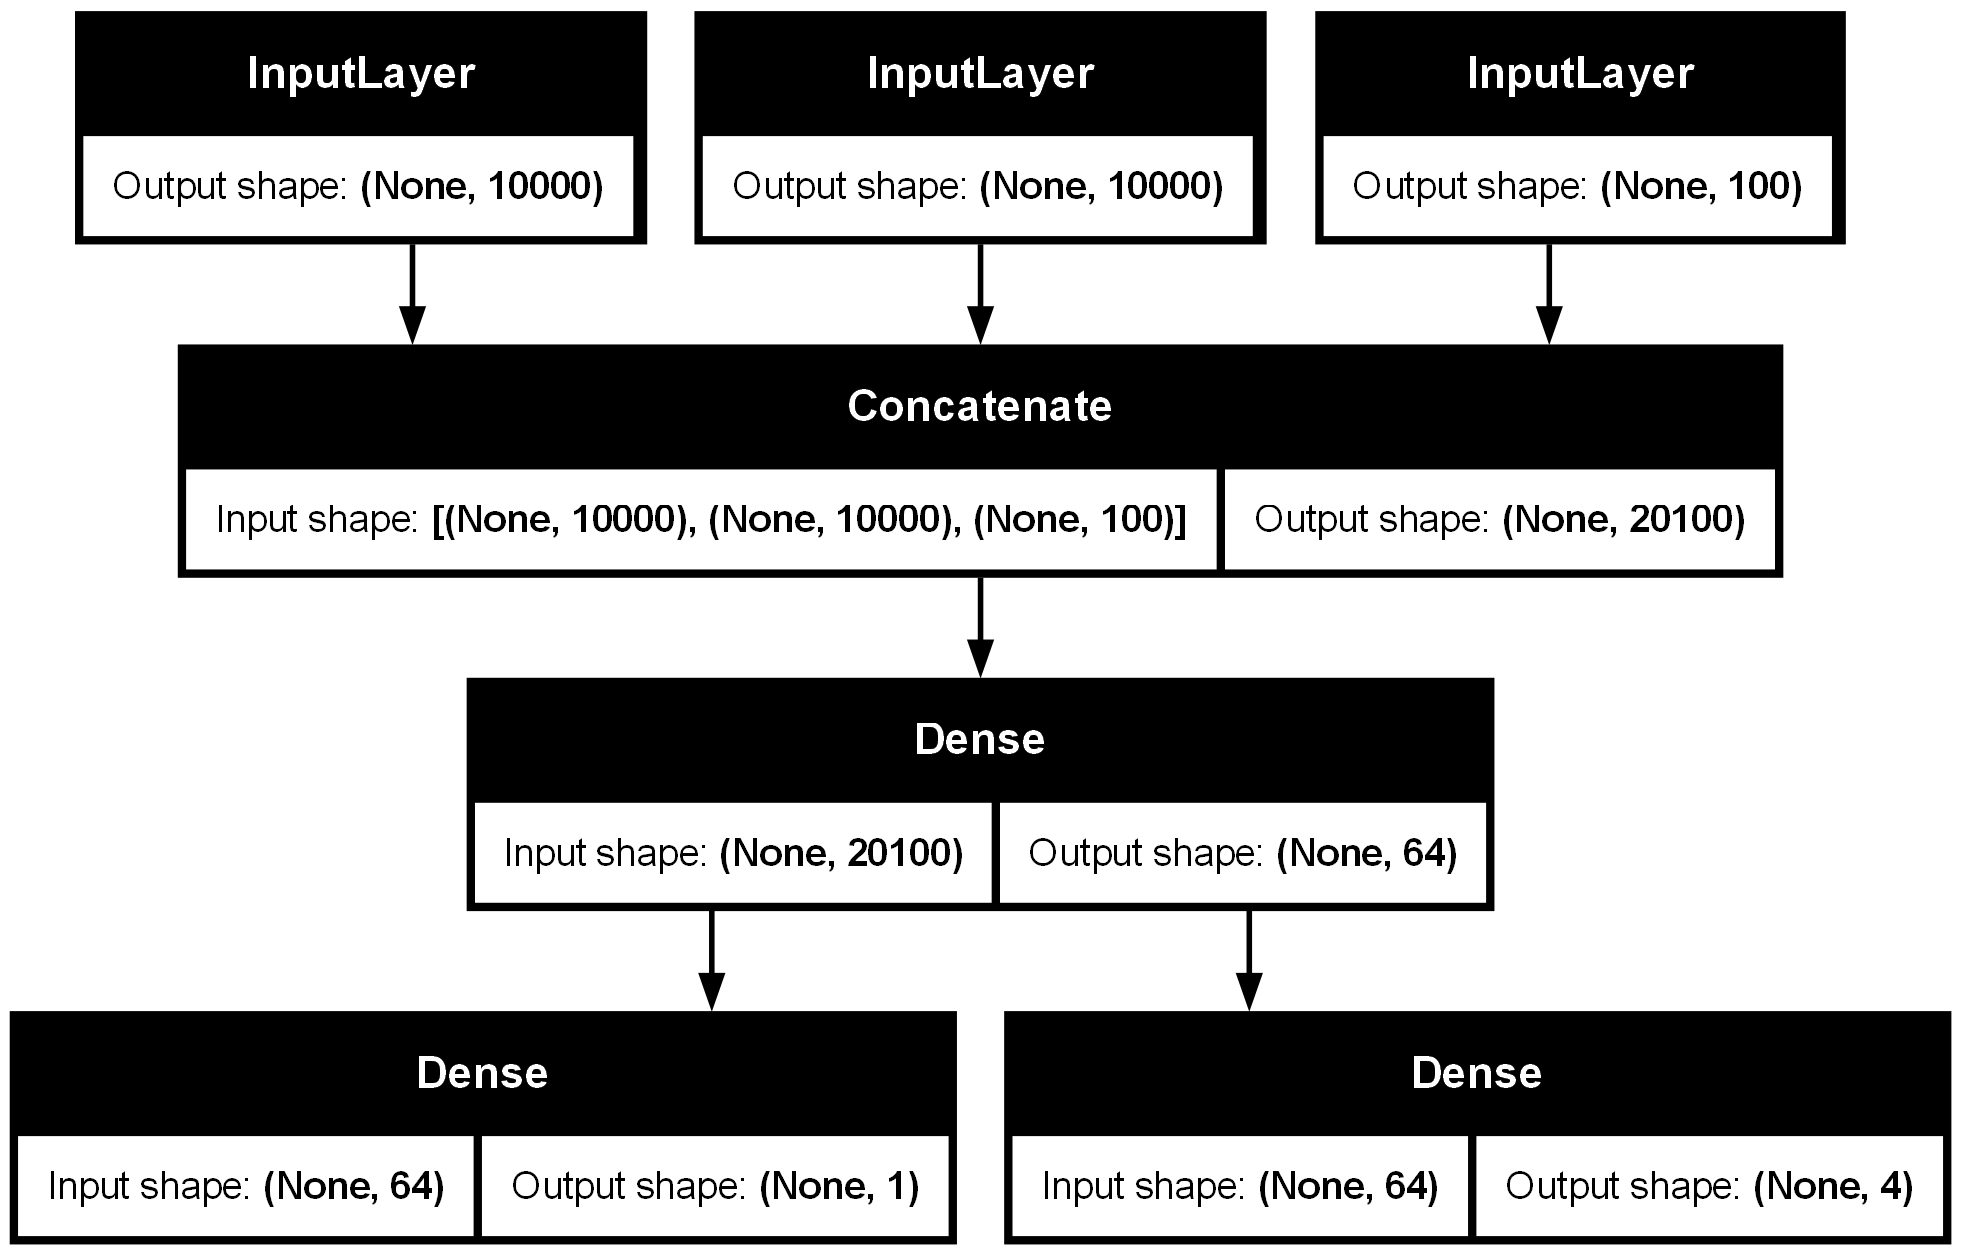

In [17]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

Retrieving the inputs or outputs of a layer in a Functional model

In [18]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [19]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=tags>]

In [20]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_12>

Creating a new model by reusing intermediate layer outputs

In [21]:
features = model.layers[4].output
difficulty = layers.Dense(3,activation='softmax',name='difficulty') (features)

new_model = keras.Model(
    inputs=[title,text_body,tags],
    outputs=[priority,department,difficulty]
)

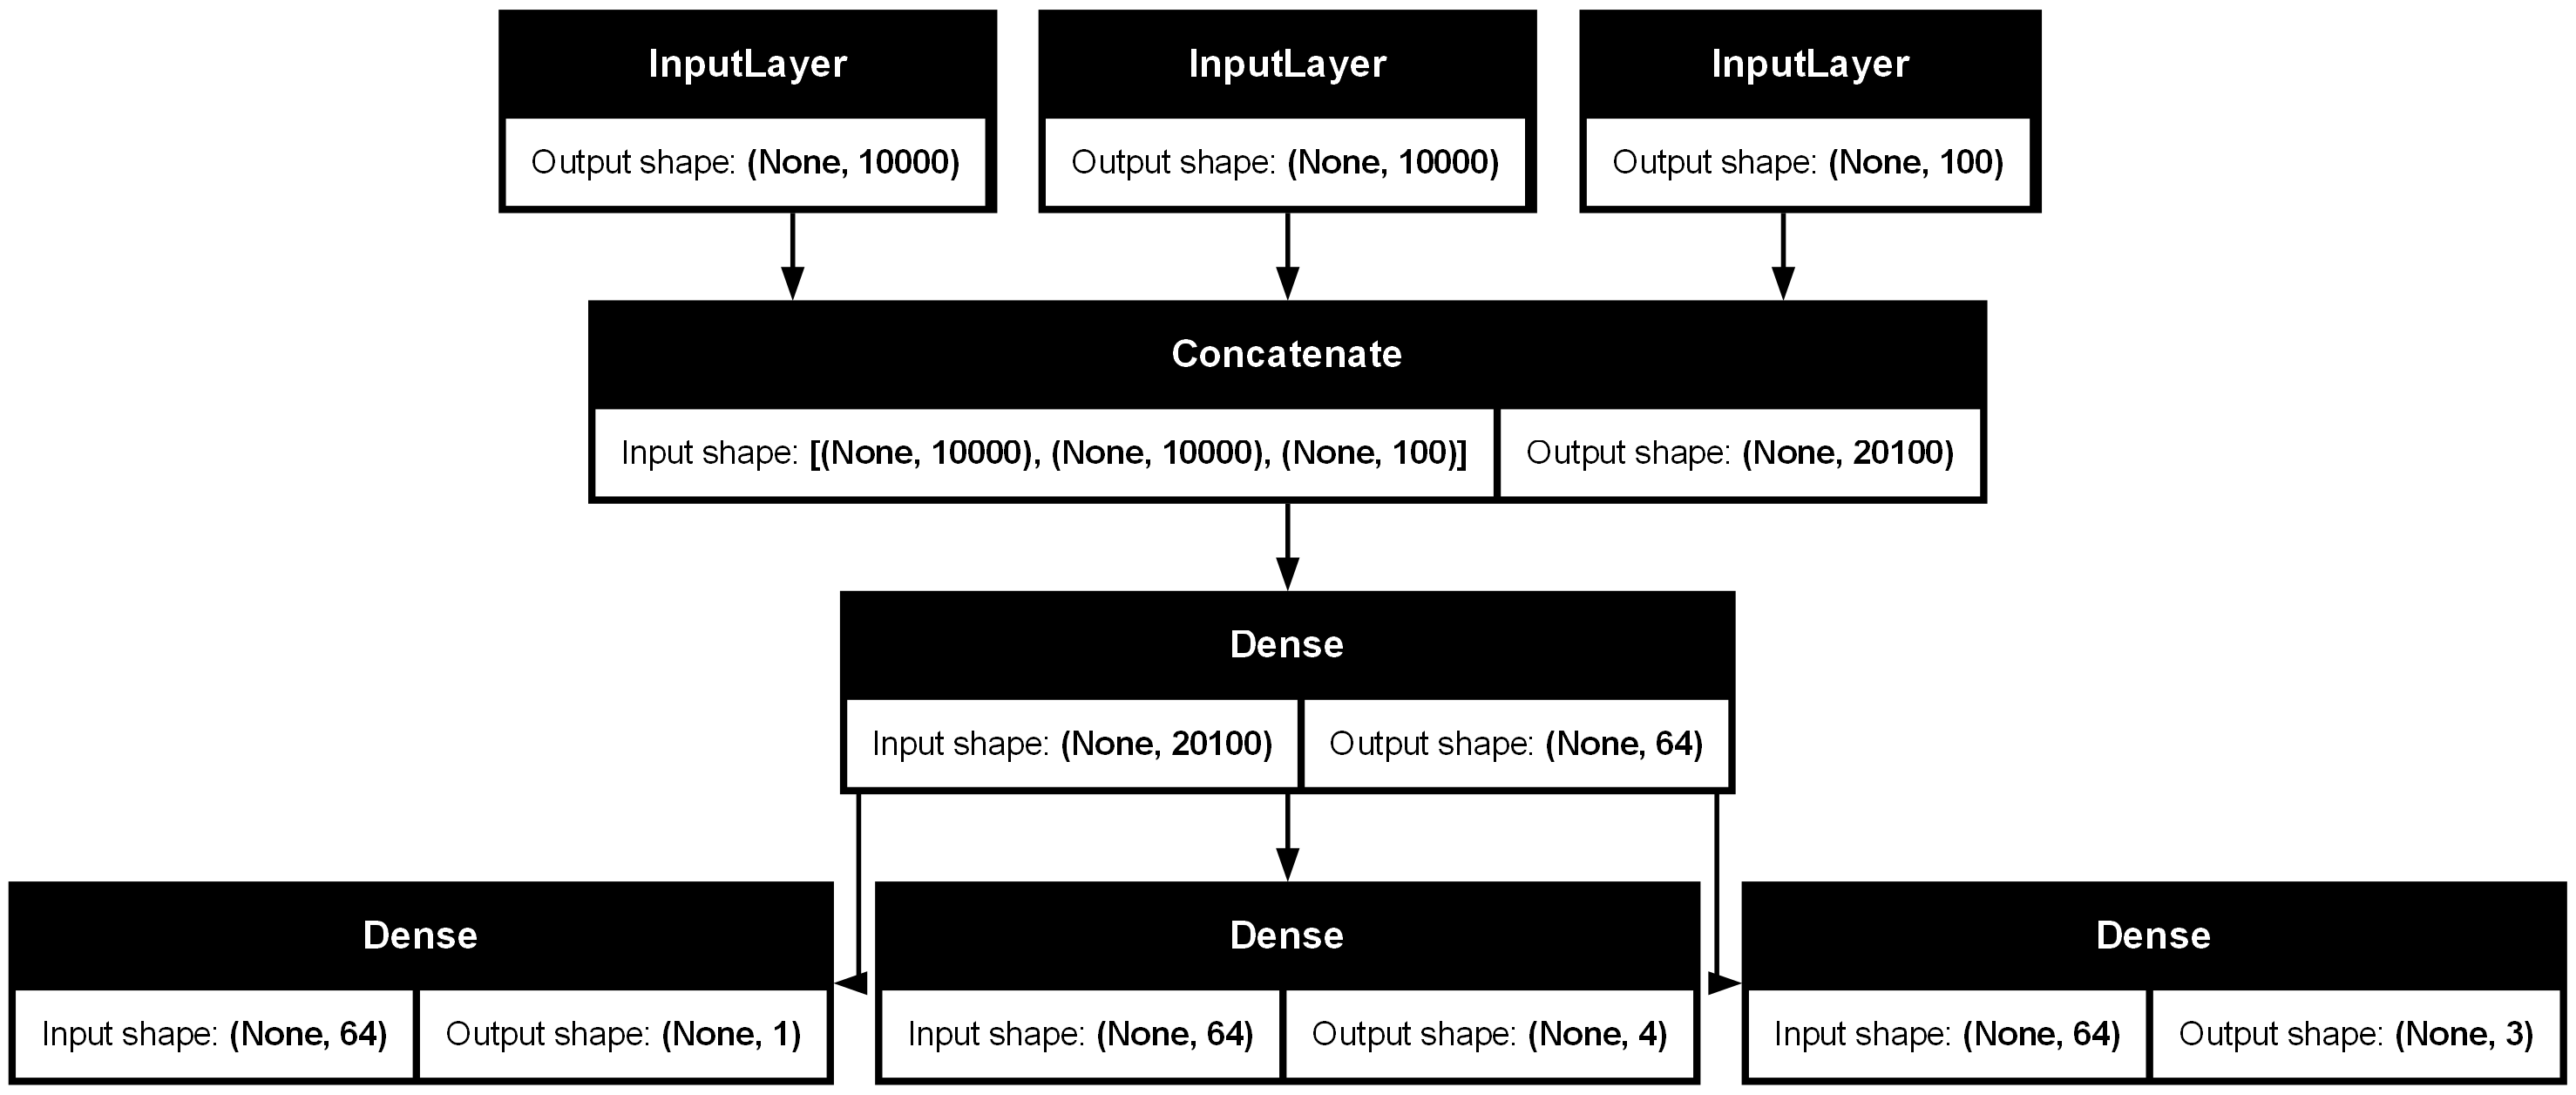

In [22]:
keras.utils.plot_model(
new_model, "updated_ticket_classifier.png", show_shapes=True)

# Subclass model

A simple subclassed model

In [23]:
class CustomerTicketModel(keras.Model):
    
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64,activation='relu')
        self.priority_scorer = layers.Dense(1,activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments,activation='softmax')
        
    def call(self,inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        
        return priority,department

In [24]:
model = CustomerTicketModel(num_departments=4)

priority,department = model({"title":title_data,"text_body":text_body_data,"tags":tags_data})


In [25]:
model.compile(optimizer='rmsprop',
              loss = ['mean_squared_error','categorical_crossentropy'],
              metrics = [['mean_absolute_error'],['accuracy']])

model.fit({'title':title_data,"text_body":text_body_data,"tags":tags_data},
          [priority_data,department_data],
          epochs=1)

model.evaluate({'title':title_data,"text_body":text_body_data,"tags":tags_data},
             [priority_data,department_data])

priority_preds, department_preds = model.predict({'title':title_data,"text_body":text_body_data,"tags":tags_data})


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2623 - categorical_crossentropy_loss: 20.7981 - loss: 21.0834 - mean_absolute_error: 0.4510 - mean_squared_error_loss: 0.2854
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2623 - categorical_crossentropy_loss: 4.6923 - loss: 5.0212 - mean_absolute_error: 0.4894 - mean_squared_error_loss: 0.3289
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Creating a Functional model that includes a subclassed model

In [26]:
class Classifier(keras.Model):
    
    def __init__(self,num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation ='softmax'
        self.dense = layers.Dense(num_units, activation=activation)
        
    def call(self, inputs):
        return self.dense(inputs)
    

In [27]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64,activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

Creating a subclassed model that includes a Functional model

In [28]:
inputs = keras.Input(shape=(3,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64,activation='relu')
        self.classifier = binary_classifier
        
    def call(self,inputs):
        features = self.dense(inputs)
        return self.classifier(features)    

model =MyModel()

# Using built-in training and evaluation loops

The standard workflow: compile(), fit(), evaluate(), predict()

In [29]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

In [30]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [31]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8630 - loss: 0.4496 - val_accuracy: 0.9578 - val_loss: 0.1459
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9505 - loss: 0.1689 - val_accuracy: 0.9679 - val_loss: 0.1199
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9617 - loss: 0.1321 - val_accuracy: 0.9724 - val_loss: 0.1080
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9695 - loss: 0.1140
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Writing your own metrics**

Implementing a custom metric by subclassing the Metric class

In [32]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    
    def __init__(self,name='rmse',**kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum',initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples',initializer='zeros',dtype='int32')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true,depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [33]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',RootMeanSquaredError()])

model.fit(train_images,train_labels,epochs=3,
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images,test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8644 - loss: 0.4519 - rmse: 0.4392 - val_accuracy: 0.9588 - val_loss: 0.1460 - val_rmse: 0.2516
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9508 - loss: 0.1677 - rmse: 0.2744 - val_accuracy: 0.9693 - val_loss: 0.1111 - val_rmse: 0.2156
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9635 - loss: 0.1286 - rmse: 0.2385 - val_accuracy: 0.9681 - val_loss: 0.1150 - val_rmse: 0.2179
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1217 - rmse: 0.2259


# Callbacks

Using the callbacks argument in the fit() method

In [34]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2),
    keras.callbacks.ModelCheckpoint(filepath='Checkpoint_path.keras',monitor='val_loss',save_best_only=True)
]

model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,
          epochs = 10,
          callbacks = callbacks_list,
          validation_data=(val_images, val_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8643 - loss: 0.4505 - val_accuracy: 0.9599 - val_loss: 0.1442
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9504 - loss: 0.1681 - val_accuracy: 0.9666 - val_loss: 0.1190
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1274 - val_accuracy: 0.9702 - val_loss: 0.1036
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9689 - loss: 0.1106 - val_accuracy: 0.9750 - val_loss: 0.0949
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9717 - loss: 0.1003 - val_accuracy: 0.9766 - val_loss: 0.0942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9735 - loss: 0.0947 - val_accuracy: 0.9766 - val_loss: 0.0925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9762 - loss: 0.0872 - val_accuracy: 0.9774 - val_loss: 0.0898
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0791 - 

Creating a custom callback by subclassing the Callback class

In [37]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.4464 - val_accuracy: 0.9594 - val_loss: 0.1413
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9507 - loss: 0.1693 - val_accuracy: 0.9671 - val_loss: 0.1181
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9605 - loss: 0.1347 - val_accuracy: 0.9724 - val_loss: 0.1019
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9691 - loss: 0.1110 - val_accuracy: 0.9751 - val_loss: 0.1002
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0971 - val_accuracy: 0.9762 - val_loss: 0.0936
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0993 - val_accuracy: 0.9775 - val_loss: 0.0916
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9762 - loss: 0.0853 - val_accuracy: 0.9793 - val_loss: 0.0925
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0843 - 

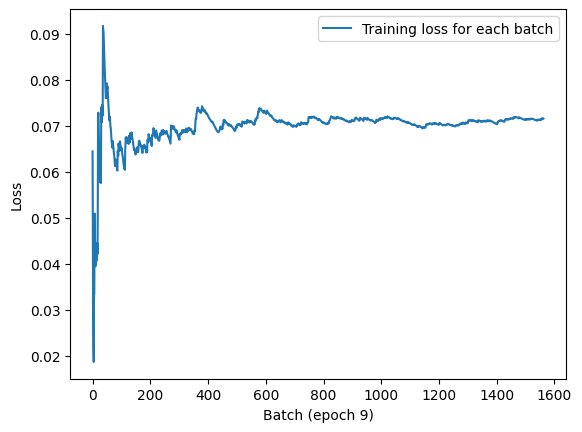

In [38]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images,train_labels,
          epochs = 10,
          callbacks = [LossHistory()],
          validation_data=(val_images, val_labels))

Monitoring and visualization with TensorBoard

In [40]:
model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir = "/full_path_to_your_log_dir",
)

model.fit(train_images,train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8682 - loss: 0.4398 - val_accuracy: 0.9571 - val_loss: 0.1487
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9514 - loss: 0.1663 - val_accuracy: 0.9684 - val_loss: 0.1182
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.1292 - val_accuracy: 0.9714 - val_loss: 0.1162
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9656 - loss: 0.1186 - val_accuracy: 0.9748 - val_loss: 0.0975
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9720 - loss: 0.1000 - val_accuracy: 0.9749 - val_loss: 0.1017
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0880 - val_accuracy: 0.9781 - val_loss: 0.0930
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9775 - loss: 0.0826 - val_accuracy: 0.9785 - val_loss: 0.0905
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9786 - loss: 0.0769 - 

In [41]:
# tensorboard --logdir /full_path_to_your_log_dir to run it

# Writing your own training and evaluation loops

Low-level usage of metrics

In [42]:
metric = keras.metrics.SparseCategoricalAccuracy()

targets = [0,1,2]
predictions = [[1,0,0],[0,1,0],[0,0,1]]
metric.update_state(targets, predictions)
current_result = metric.result()

print(f"result: {current_result:.2f}")

result: 1.00


In [43]:
values = [0,1,2,3,4]
mean_tracker = keras.metrics.Mean()
for value in values :
    mean_tracker.update_state(value)
print(f"mean of values: {mean_tracker.result():.2f}")

mean of values: 2.00


A complete training and evaluation loop

In [48]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

Writing a step-by-step training loop: resetting the metrics

In [49]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

Writing a step-by-step training loop: the loop itself

In [50]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9139
...loss: 0.2897
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9541
...loss: 0.1604
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9629
...loss: 0.1316


Writing a step-by-step evaluation loop

In [51]:
def test_step(inputs,targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs= {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs    

In [52]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch,targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key,value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9718
...val_loss: 0.1050


Make it fast with tf.function

In [53]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9718
...val_loss: 0.1050


**Leveraging fit() with a custom training loop**

Implementing a custom training step to use with fit()

In [54]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [55]:
inputs = keras.Input(shape=(28*28,))
features = layers.Dense(512,activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10,activation='softmax')(features)
model = CustomModel(inputs,outputs)

model.compile(optimizer = keras.optimizers.RMSprop())

model.fit(train_images,train_labels,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4482
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1636
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1300
